## Astronomy 534 "Extragalactic Universe" (Winter 2025)

### Note: The code takes close to 30 minutes to run, because I'm doing a bunch of MCMC fits. The plots should be outputted already, but if you can't see them, I can send them separately.

### Luminosity Distance

**Learning goals:** understand the dependence of the luminosity distance on the cosmological parameters and use a dataset of supernova type Ia to constrain $H_0$, $\Omega_m$, and $\Omega_\Lambda$.

Type Ia supernovae are an essential step of the distance ladder, and they can be used to calibrate cosmological parameters with data out to about 10 Gpc. Previous studies have found that the Hubble constant, $H_0$, has a statistically significant higher value when measured from SN Ia observations than it does when measured from CMB observations. This discrepancy is called the Hubble tension.

Indirect measurements of $H_0$ from CMB measurements almost uniformly return a lower value of $H_0$ than direct measurements of luminosity distances, such as SN Ia observations ([Di Valentino 2021](https://arxiv.org/pdf/2103.01183)). [The Planck Collaboration (2018)](https://arxiv.org/pdf/1807.06209), for instance, finds $H_0 = 66.88\pm0.92\rm\ km/s/Mpc$ from the CMB power spectrum, while [Riess (2020)](https://arxiv.org/pdf/2001.03624) finds $H_0 = 73.2\pm1.3\rm\ km/s/Mpc$, a difference of about $4\sigma$.

In this project, I set out to measure cosmological parameters using samples of SN Ia data. We will see how the parameters we derive from each sample compare with each other, and then see how they compare with values in the literature.

The luminosity distance $d_L$ is defined through the observed flux $F$ and luminosity $L$ as
$$
   F = \frac{L}{4\pi d_L^2}
$$

For a spatially flat cosmology
$$
    d_L = r (1+z)
$$
where the comoving distance to the emitter at redshift $z$ and expansion factor $a$ is
$$
   r = \frac{c}{H_0} \int_a^{1} \frac{da}{a^2\,E(a)}
$$
and
$$
   E(a)^2 = {\Omega_{m0}\,a^{-3} + \Omega_\Lambda}
$$
at redshifts $z<10$ when we can ignore the radiation density.

Let's write a direct implementation of these equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('mplstyle.txt')

### Supernova samples

We will use two observed samples. The first is 740 supernovae from the survey of [Betoule et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract). Download the file `jla_lcparams.txt` containing the sample from Canvas folder `Files/Data`. [This link](http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html) describes the data columns. From this file we will read the SN redshift, apparent B magnitude, and its measurement error.

In [2]:
# zCMB: SNIa redshifts in the CMB frame
# mB, emB: apparent B-magnitude and its error
    
z1_cmb, z1_hel, mB, emB, x1, color, biasB = np.loadtxt('data/jla_lcparams.txt', usecols=(1,2,4,5,6,8,20), unpack=True)
z1 = z1_cmb

print('Read sample of %d supernovae' % np.size(z1))

Read sample of 740 supernovae


We calculate the distance modulus using Equation 4 from [Betoule et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract), which accounts for differences in intrinsic peak B-band magnitude. This correction is given below, where $\alpha = 0.141$ and $\beta = 3.101$.

$$
\mu = m_B^* - (M_B - \alpha \times X_1 + \beta \times C)
$$

In [3]:
M0sn = -19.05 # assumed universal absolute magnitude

mu1 = mB - (M0sn - .141 * x1 + 3.101 * color)            # distance modulus
d1_L = 1.e-9*10*10.**(0.2*mu1) # luminosity distance in Gpc
d1_err = 1.e-9 * 2 * np.log(10) * 10.**(0.2*mu1) * emB

The second sample is from the Supernova Cosmology Project [Union dataset](http://supernova.lbl.gov/Union/). Download the file `SCPUnion2.1_mu_vs_z.txt` containing the sample from Canvas folder `Files/Data`. [This link](http://supernova.lbl.gov/Union/descriptions.html#Magvsz) describes the data columns. From this file we will read the SN redshift, distance modulus, and its measurement error. This distance modulus is already corrected, so we will use this dataset as it is.

In [4]:
z2, mu2, emu2 = np.loadtxt('data/SCPUnion2.1_mu_vs_z.txt', usecols=(1,2,3), unpack=True)

d2_L = 1.e-8*10.**(0.2*mu2)  # luminosity distance in Gpc
d2_err = 1.e-9 * 2 * np.log(10) * 10.**(0.2*mu2) * emu2

print('Read sample of %d supernovae' % np.size(z2))

Read sample of 580 supernovae


The newest surveys [Pantheon and SH0ES](https://github.com/PantheonPlusSH0ES/PantheonPlusSH0ES.github.io) now have their data available [here](https://github.com/PantheonPlusSH0ES/DataRelease/tree/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR). We now query this data and load it in. The distance modulus is already corrected in this sample.

In [5]:
import pandas as pd

dataset_3 = pd.read_csv('data/Pantheon+SH0ES.dat', sep='\s+', header=0)
z3, zerr3, mu3, emu3 = dataset_3['zHD'], dataset_3['zHDERR'], dataset_3['MU_SH0ES'], dataset_3['MU_SH0ES_ERR_DIAG']

d3_L = 1.e-8*10.**(0.2*mu3)  # luminosity distance in Gpc
d3_err = 1.e-9 * 2 * np.log(10) * 10.**(0.2*mu3) * emu3

Now plot the Hubble law with $H_0 = 70\rm\ km\ s^{-1}\ Mpc^{-1}$:

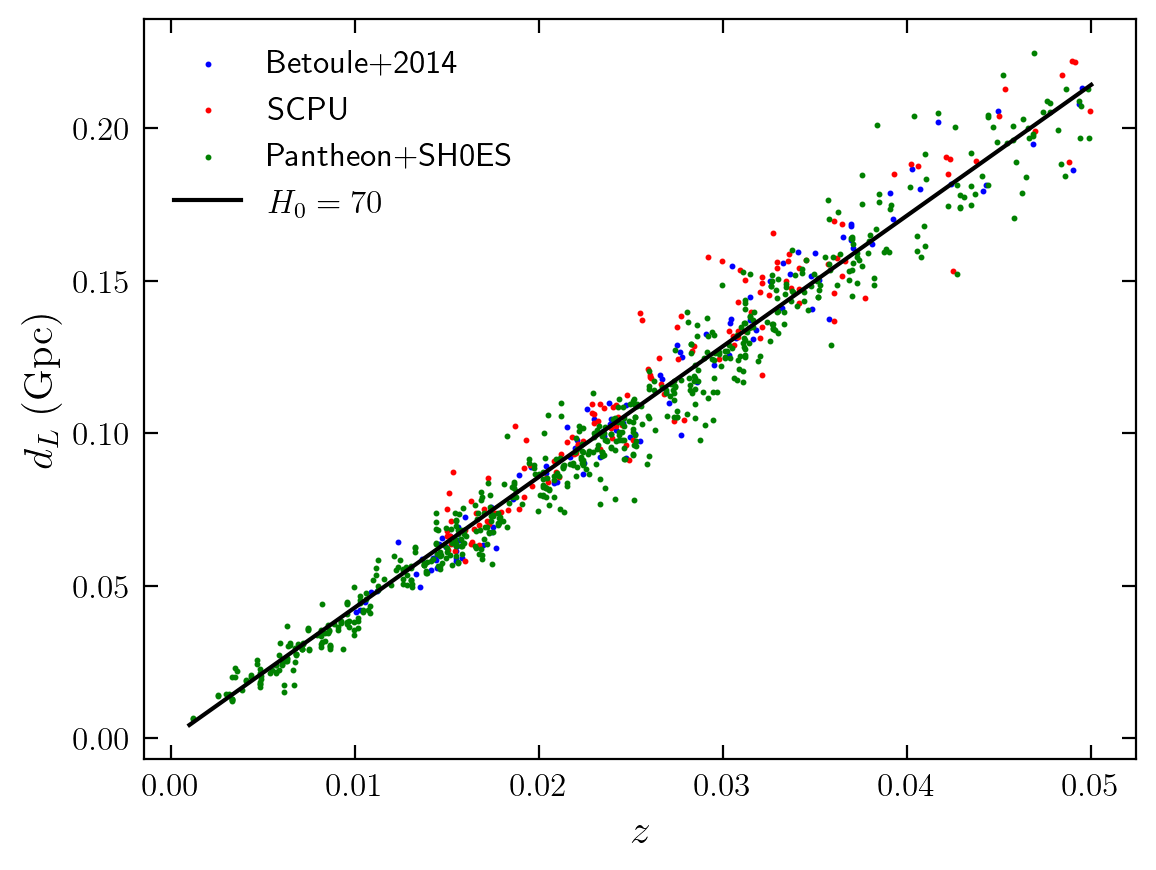

In [6]:
# first sample
lowz = z1 < 0.05
plt.scatter(z1[lowz], d1_L[lowz], c='b', marker='.', s=5, label='Betoule+2014')

# second sample
lowz = z2 < 0.05
plt.scatter(z2[lowz], d2_L[lowz], c='r', marker='.', s=5, label='SCPU')

# third sample
lowz = z3 < 0.05
plt.scatter(z3[lowz], d3_L[lowz], c='g', marker='.', s=5, label='Pantheon+SH0ES')

# expected Hubble law
c = 3e5 # km/s
H0 = 70 # km/s/Mpc
z = np.array([0.001, 0.05])
d = c*z/(H0*1000)
plt.plot(z, d, c='k', label='$H_0=70$')

plt.xlabel(r'$z$')
plt.ylabel(r'$d_L \; ({\rm Gpc})$')
plt.legend(loc='upper left');

The full distribution at all redshifts:

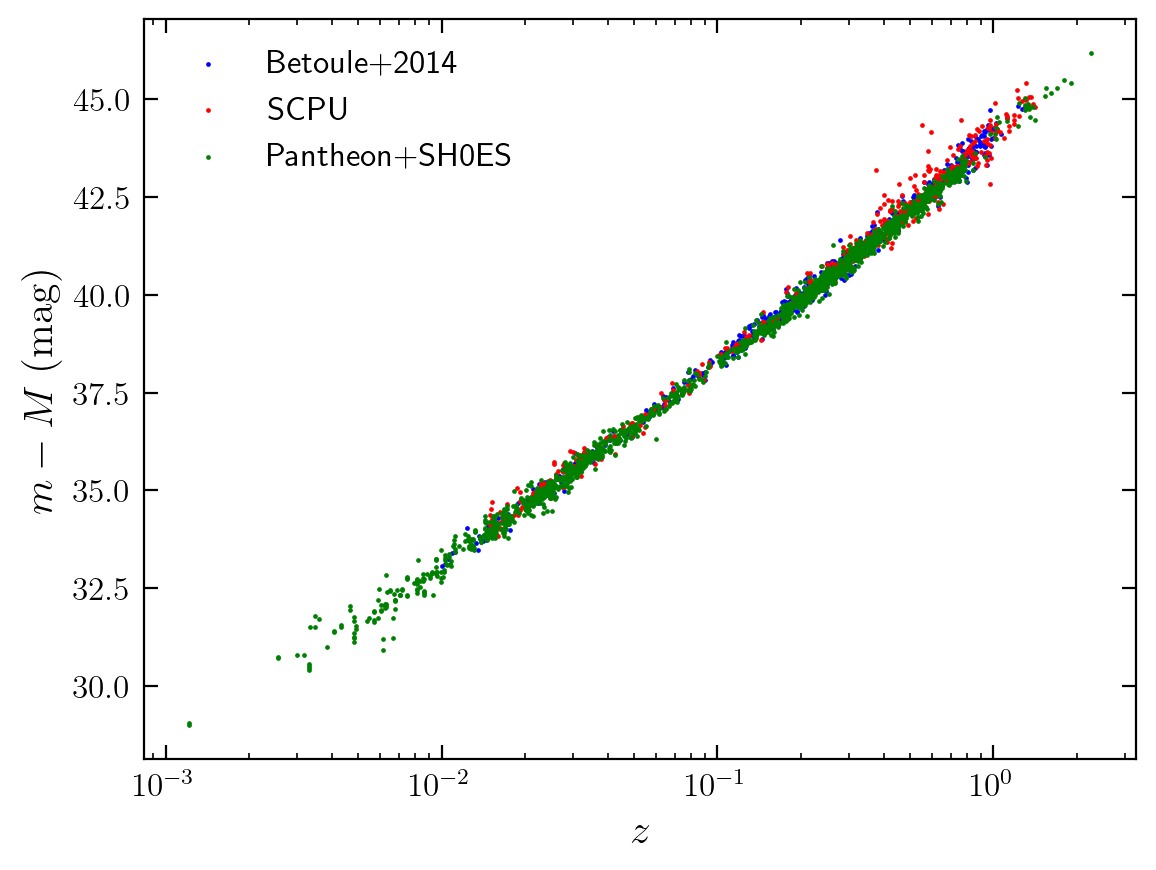

In [7]:
plt.scatter(z1, mu1, c='b', marker='.', s=2, label='Betoule+2014')
plt.scatter(z2, mu2, c='r', marker='.', s=2, label='SCPU')
plt.scatter(z3, mu3, c='g', marker='.', s=2, label='Pantheon+SH0ES')

plt.xlabel(r'$z$')
plt.ylabel(r'$m-M \; ({\rm mag})$')
plt.xscale('log')
plt.legend(loc='upper left');

We can also compare redshift distributions of the three samples. The first two samples are similar, but the third samples has many more low-redshift supernovae.

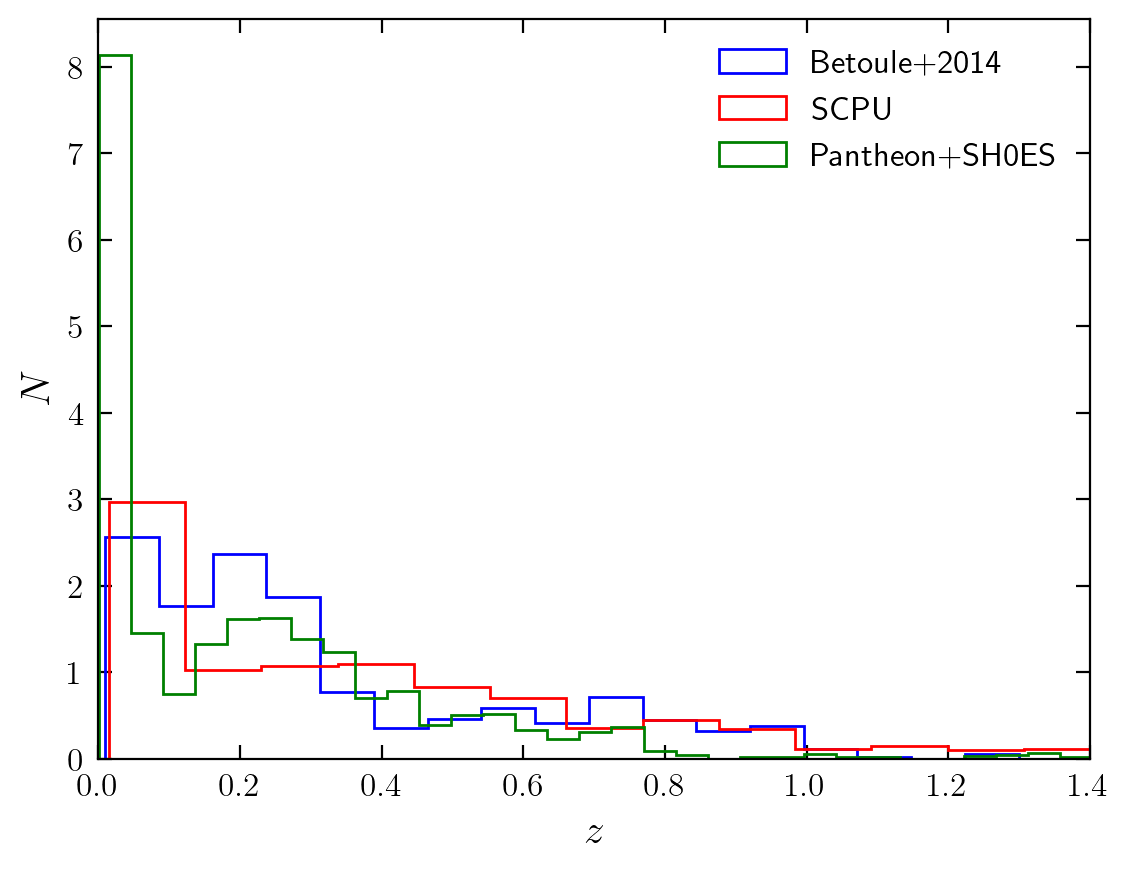

In [8]:
# astropy histogram
from astropy.visualization import hist

hist(z1, bins='knuth', color='b', histtype='step', density=True, label='Betoule+2014')
hist(z2, bins='knuth', color='r', histtype='step', density=True, label='SCPU')
hist(z3, bins='knuth', color='g', histtype='step', density=True, label='Pantheon+SH0ES')

plt.xlabel(r'$z$')
plt.ylabel(r'$N$')
plt.legend(loc='upper right');
plt.xlim(0, 1.4);

> __Project idea__: Fit the luminosity distance for all three samples independently to find the best-fit values of $\Omega_{m0}\,$, $\Omega_\Lambda\,$, and $H_0$. Investigate the difference between the two samples and covariances of the parameters.

We start by plotting all of the datasets together, with error bars.

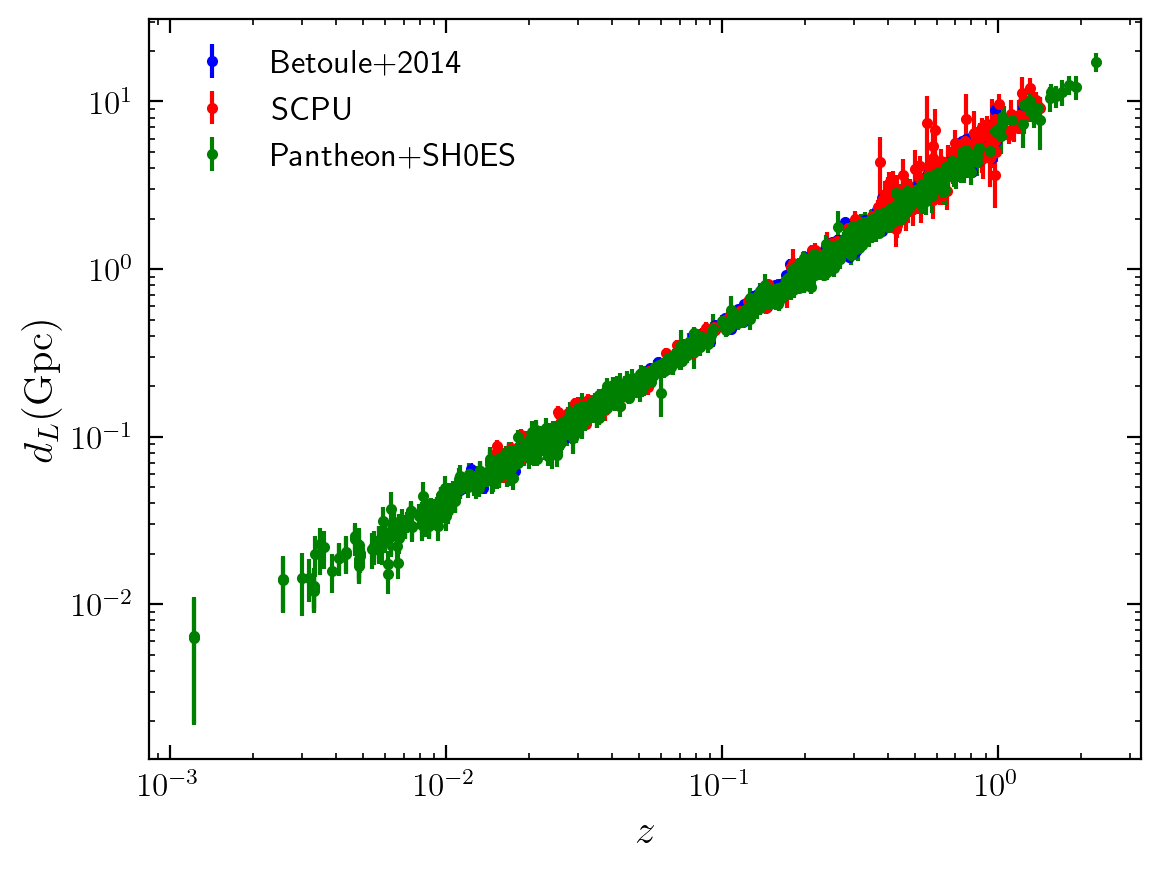

In [9]:
plt.xscale('log')
plt.yscale('log')

plt.errorbar(z1, d1_L, yerr=d1_err, c='b', marker='.', linestyle='None', label='Betoule+2014')
plt.errorbar(z2, d2_L, yerr=d2_err,c='r', marker='.', linestyle='None', label='SCPU')
plt.errorbar(z3, d3_L, yerr=d3_err, c='g', marker='.', linestyle='None', label='Pantheon+SH0ES')

plt.xlabel(r'$z$')
plt.ylabel(r'$d_L (\rm Gpc)$')
plt.legend(loc='upper left');

Now we use $\texttt{emcee}$ to fit each of the samples separately. We restrict $H_0$ to be between 50 and 100 km/s/Mpc, and we restrict $\Omega_m$ to be between 0 and 1. We then set $\Omega_\Lambda$ to be $1 - \Omega_m$, which assumes a flat universe with negligible radiation density. For each sample, we plot a corner plot, with vertical lines plotted at $H_0 = 70$ and $\Omega_m = 0.3$. We then plot the median fit with 68% and 95% confidence intervals for each sample.

In [10]:
from scipy import integrate

def d_L(z, H0, Omega_m, Omega_Lambda): # calculates luminosity distance in Gpc as a function of redshift
    H0 = H0 * 3.24e-20 # km/s/Mpc to 1/s
    c = 3e10 # cm/s
    def integrand(x, Omega_m, Omega_Lambda):
        return 1/np.sqrt(Omega_Lambda + Omega_m * (1+x)**3)
    return c / H0 * (1+z) * integrate.quad(integrand, 0, z, args=(Omega_m, Omega_Lambda))[0] / 3.086e27 # cm to Gpc

# necessary functions for emcee fitting
def log_likelihood(theta, z, dL, dL_err):
    H0, Omega_m = theta
    Omega_Lambda = 1 - Omega_m
    sigma2 = dL_err**2 
    model = np.array([d_L(zi, H0, Omega_m, Omega_Lambda) for zi in z])
    return -0.5 * np.sum((dL - model)**2 / sigma2 + np.log(2*np.pi*sigma2))

def log_prior(theta):
    H0, Omega_m = theta
    if 50 < H0 < 100 and 0 < Omega_m < 1:
        return 0
    return -np.inf

def log_posterior(theta, z, dL, dL_err):
    if not np.isfinite(log_prior(theta)):
        return -np.inf
    return log_prior(theta) + log_likelihood(theta, z, dL, dL_err)

# Betoule et al. 2014:

In [11]:
ndim = 2
nwalkers = 10
nsteps = 2000

p0 = np.random.uniform(50, 100, (nwalkers, 1))
p0 = np.append(p0, np.random.uniform(0, 1, (nwalkers, 1)), axis=1)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z1, d1_L, d1_err))
p0, _, _ = sampler.run_mcmc(p0, nsteps, progress=True)

100%|██████████| 2000/2000 [03:31<00:00,  9.46it/s]


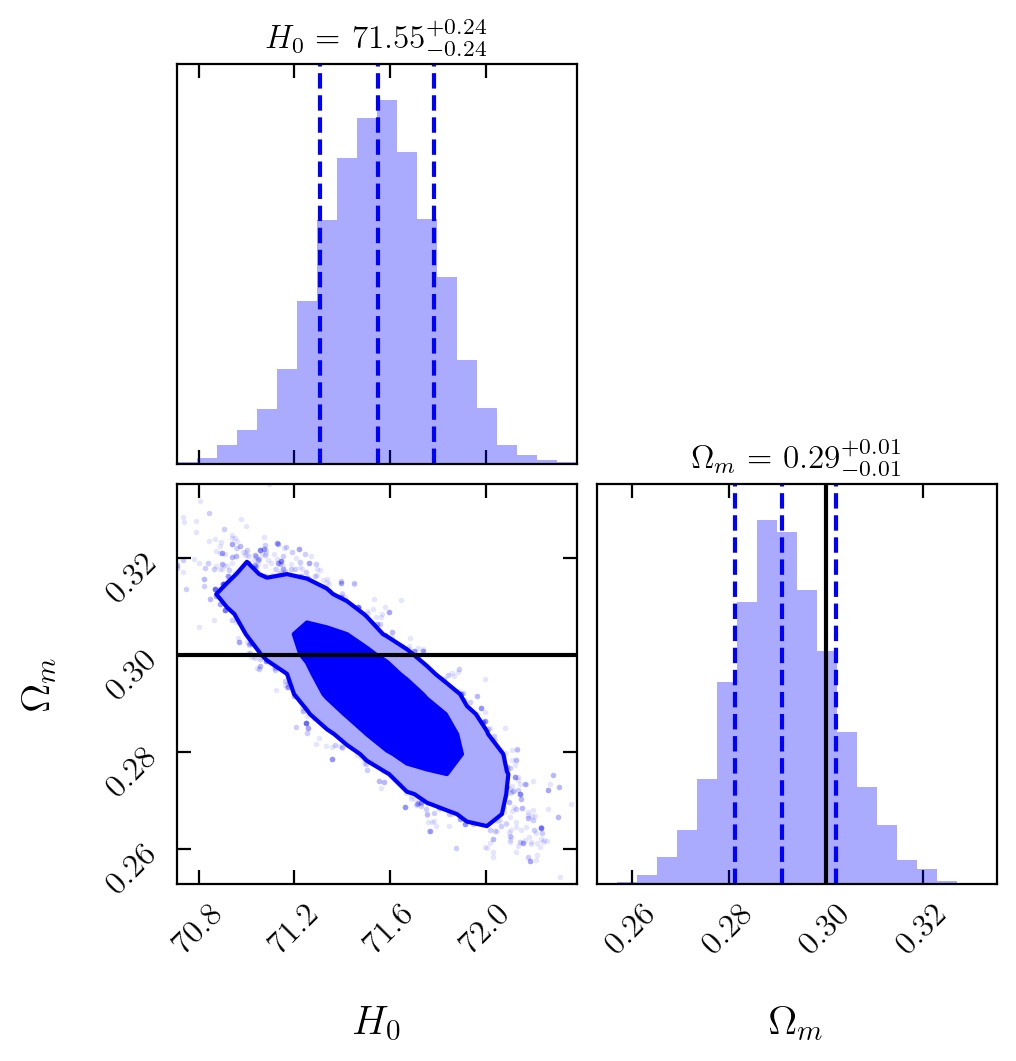

In [12]:
flat_samples1 = sampler.get_chain(discard=400, thin=1, flat=True)

import corner
fig = corner.corner(flat_samples1, labels=['$H_0$', '$\Omega_m$'], color='b', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], quantiles=[0.16, 0.5, 0.84], hist_kwargs={'color': 'b', 'alpha':1/3, 'linewidth':0, 'fill': True}, show_titles=True)

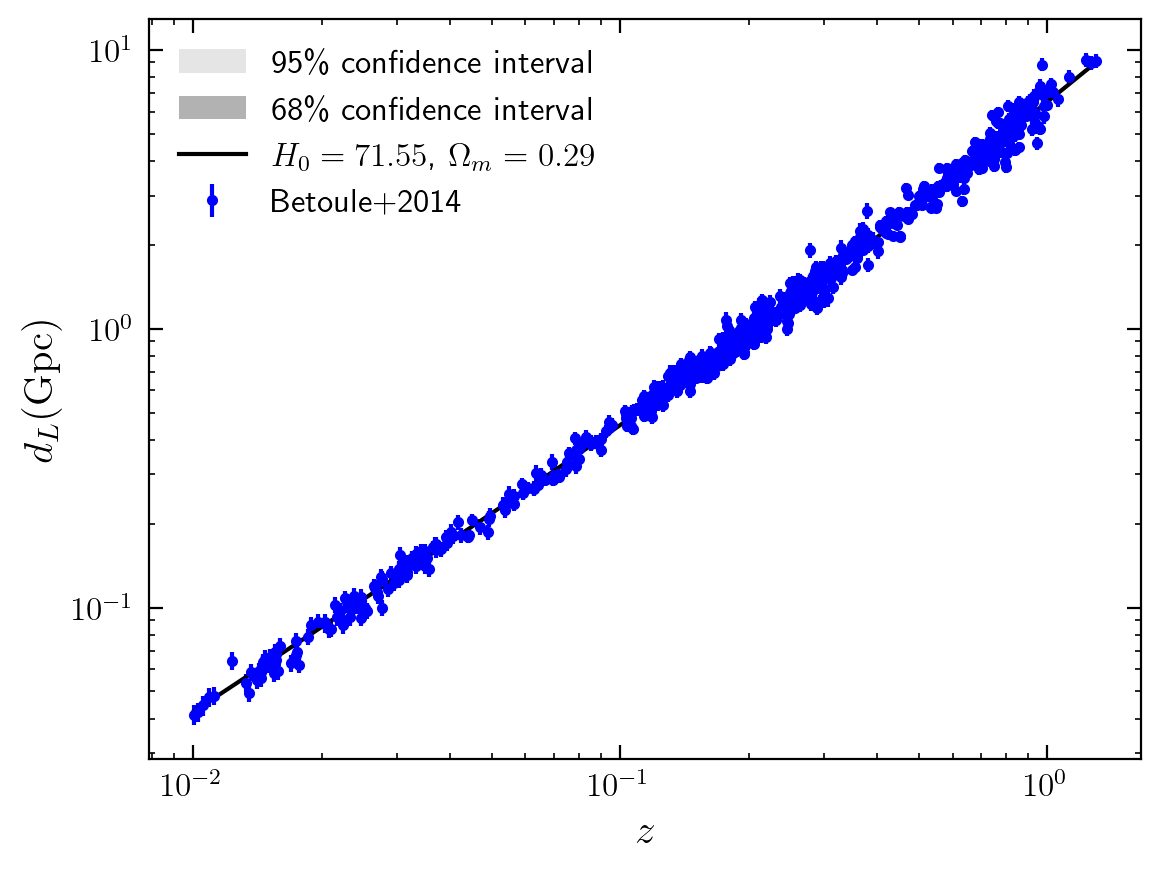

In [13]:
model_1 = np.zeros((100, len(z1)))
for i in range(len(model_1)):
    rand_sample = flat_samples1[np.random.randint(len(flat_samples1))]
    model_1[i] = np.array([d_L(zi, rand_sample[0], rand_sample[1], 1 - rand_sample[1]) for zi in sorted(z1)])

sigm2 = np.percentile(model_1, 2.5, axis=0)
sigm1 = np.percentile(model_1, 16, axis=0)
median1 = np.median(model_1, axis=0)
sigp1 = np.percentile(model_1, 84, axis=0)
sigp2 = np.percentile(model_1, 97.5, axis=0)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$z$')
plt.ylabel(r'$d_L (\rm Gpc)$')

plt.errorbar(z1, d1_L, yerr=d1_err, c='b', marker='.', linestyle='None', label='Betoule+2014')
plt.fill_between(sorted(z1), sigm2, sigp2, color='k', alpha=0.1, label='95\% confidence interval', linewidth=0)
plt.fill_between(sorted(z1), sigm1, sigp1, color='k', alpha=0.3, label='68\% confidence interval', linewidth=0)
plt.plot(sorted(z1), median1, c='k', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$'.format(np.median(flat_samples1[:,0]), np.median(flat_samples1[:,1])))
plt.legend(loc='upper left');

# SCPU:

In [14]:
ndim = 2
nwalkers = 10
nsteps = 2000

p0 = np.random.uniform(50, 100, (nwalkers, 1))
p0 = np.append(p0, np.random.uniform(0, 1, (nwalkers, 1)), axis=1)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z2, d2_L, d2_err))
p0, _, _ = sampler.run_mcmc(p0, nsteps, progress=True)

100%|██████████| 2000/2000 [02:45<00:00, 12.10it/s]


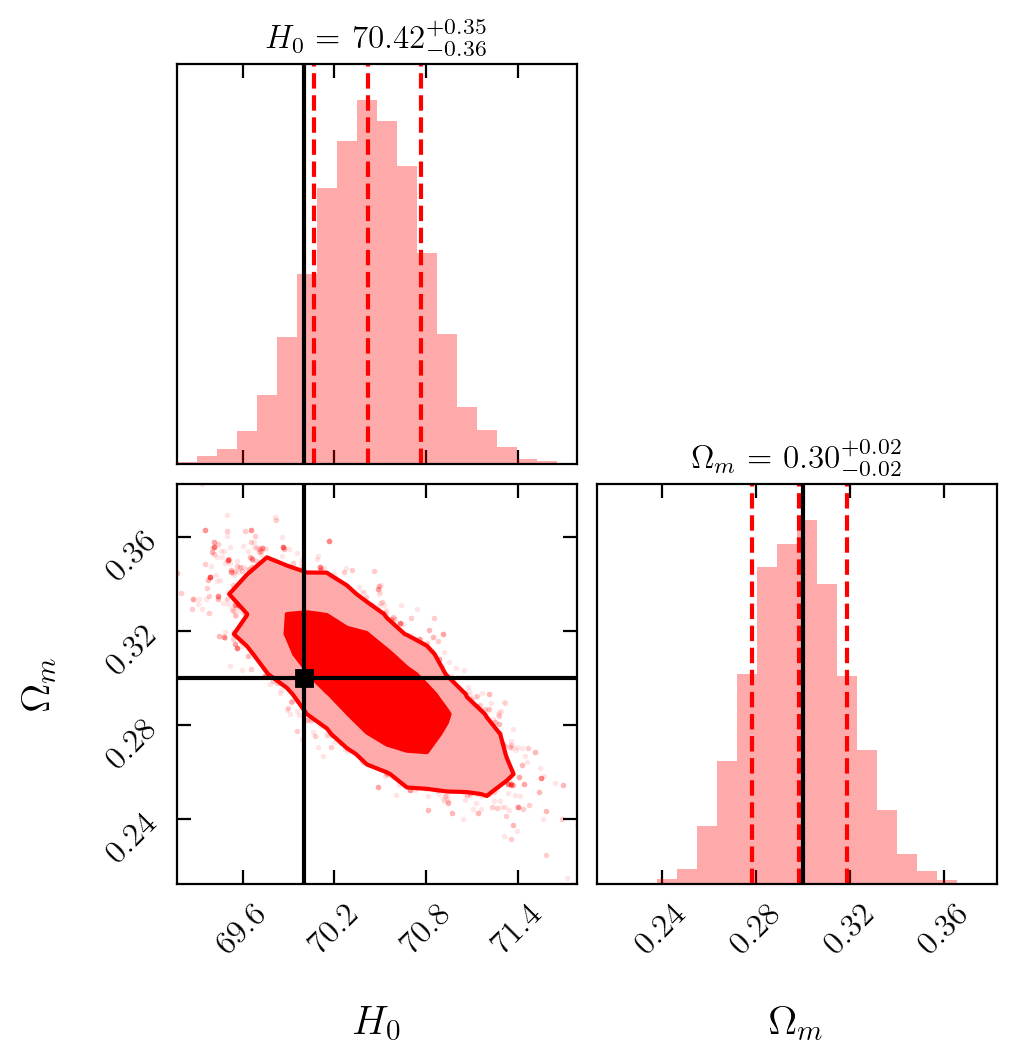

In [15]:
flat_samples2 = sampler.get_chain(discard=400, thin=1, flat=True)

import corner
fig = corner.corner(flat_samples2, labels=['$H_0$', '$\Omega_m$'], color='r', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], quantiles=[0.16, 0.5, 0.84], hist_kwargs={'color': 'r', 'alpha':1/3, 'linewidth':0, 'fill': True}, show_titles=True)

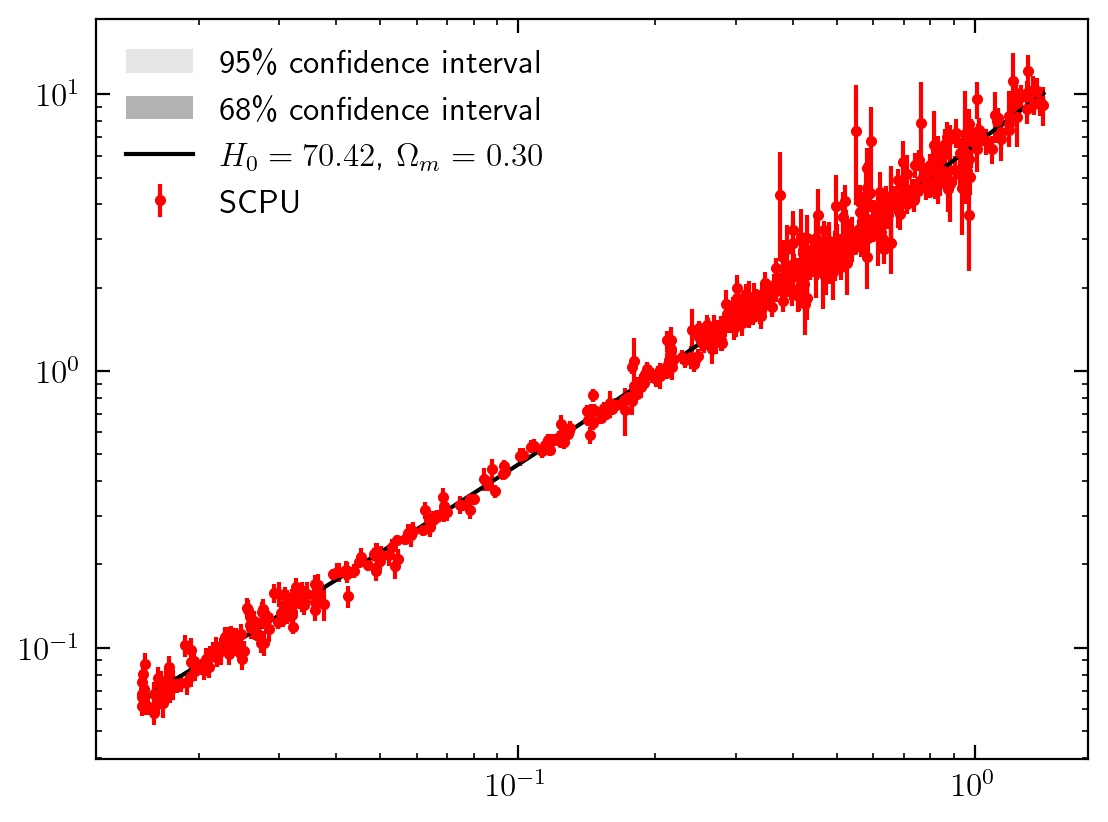

In [16]:
model_2 = np.zeros((100, len(z2)))
for i in range(len(model_2)):
    rand_sample = flat_samples2[np.random.randint(len(flat_samples2))]
    model_2[i] = np.array([d_L(zi, rand_sample[0], rand_sample[1], 1 - rand_sample[1]) for zi in sorted(z2)])

sigm2 = np.percentile(model_2, 2.5, axis=0)
sigm1 = np.percentile(model_2, 16, axis=0)
median2 = np.median(model_2, axis=0)
sigp1 = np.percentile(model_2, 84, axis=0)
sigp2 = np.percentile(model_2, 97.5, axis=0)

plt.xscale('log')
plt.yscale('log')

plt.errorbar(z2, d2_L, yerr=d2_err, c='r', marker='.', linestyle='None', label='SCPU')
plt.fill_between(sorted(z2), sigm2, sigp2, color='k', alpha=0.1, label='95\% confidence interval', linewidth=0)
plt.fill_between(sorted(z2), sigm1, sigp1, color='k', alpha=0.3, label='68\% confidence interval', linewidth=0)
plt.plot(sorted(z2), median2, c='k', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$'.format(np.median(flat_samples2[:,0]), np.median(flat_samples2[:,1])))
plt.legend(loc='upper left');

# Pantheon+SH0ES:

In [17]:
ndim = 2
nwalkers = 10
nsteps = 2000

p0 = np.random.uniform(50, 100, (nwalkers, 1))
p0 = np.append(p0, np.random.uniform(0, 1, (nwalkers, 1)), axis=1)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(z3, d3_L, d3_err))
p0, _, _ = sampler.run_mcmc(p0, nsteps, progress=True)

100%|██████████| 2000/2000 [08:07<00:00,  4.10it/s]


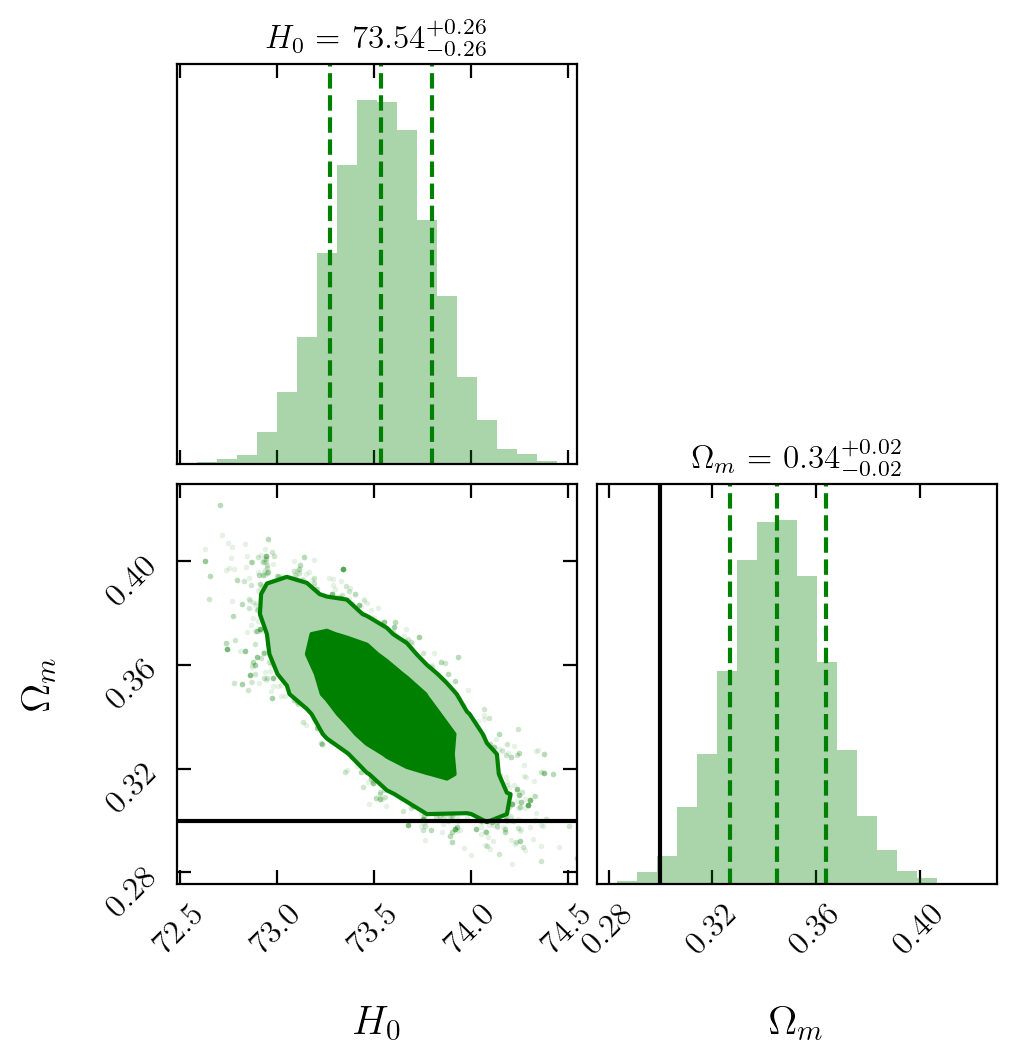

In [18]:
flat_samples3 = sampler.get_chain(discard=400, thin=1, flat=True)

import corner
fig = corner.corner(flat_samples3, labels=['$H_0$', '$\Omega_m$'], color='g', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], quantiles=[0.16, 0.5, 0.84], hist_kwargs={'color': 'g', 'alpha':1/3, 'linewidth':0, 'fill': True}, show_titles=True)

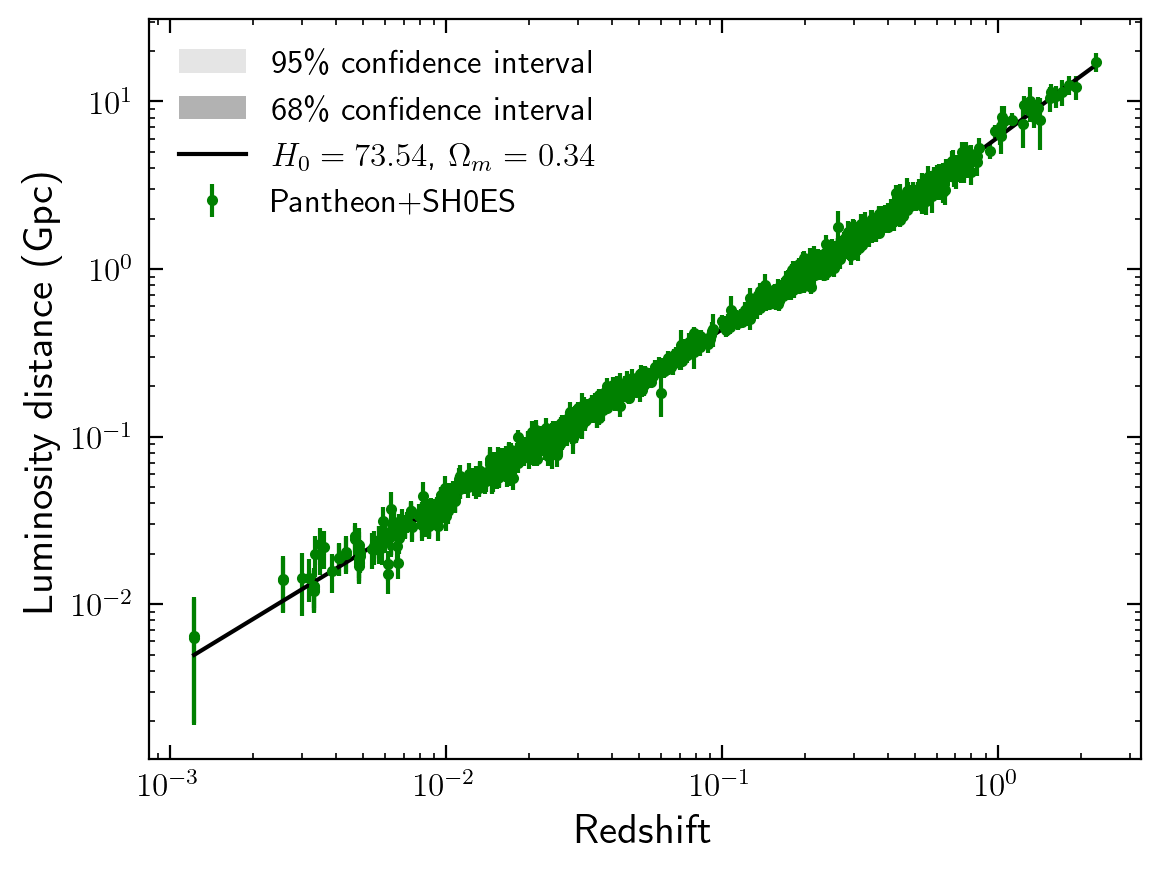

In [19]:
model_3 = np.zeros((100, len(z3)))
for i in range(len(model_3)):
    rand_sample = flat_samples3[np.random.randint(len(flat_samples3))]
    model_3[i] = np.array([d_L(zi, rand_sample[0], rand_sample[1], 1 - rand_sample[1]) for zi in sorted(z3)])

sigm2 = np.percentile(model_3, 2.5, axis=0)
sigm1 = np.percentile(model_3, 16, axis=0)
median3 = np.median(model_3, axis=0)
sigp1 = np.percentile(model_3, 84, axis=0)
sigp2 = np.percentile(model_3, 97.5, axis=0)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Redshift')
plt.ylabel('Luminosity distance (Gpc)')

plt.errorbar(z3, d3_L, yerr=d3_err, c='g', marker='.', linestyle='None', label='Pantheon+SH0ES')
plt.fill_between(sorted(z3), sigm2, sigp2, color='k', alpha=0.1, label='95\% confidence interval', linewidth=0)
plt.fill_between(sorted(z3), sigm1, sigp1, color='k', alpha=0.3, label='68\% confidence interval', linewidth=0)
plt.plot(sorted(z3), median3, c='k', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$'.format(np.median(flat_samples3[:,0]), np.median(flat_samples3[:,1])))
plt.legend(loc='upper left');

Here we plot all three of the results together. We find that Betoule et al. (2014) and SCPU agree closely on $\Omega_m$, but Pantheon+SH0ES is about 1-2 sigma away from the others. Additionally, we find that they all disagree on $H_0$, but they all find $H_0$ values higher than $70\rm\ km/s/Mpc$, consistent with previous results.

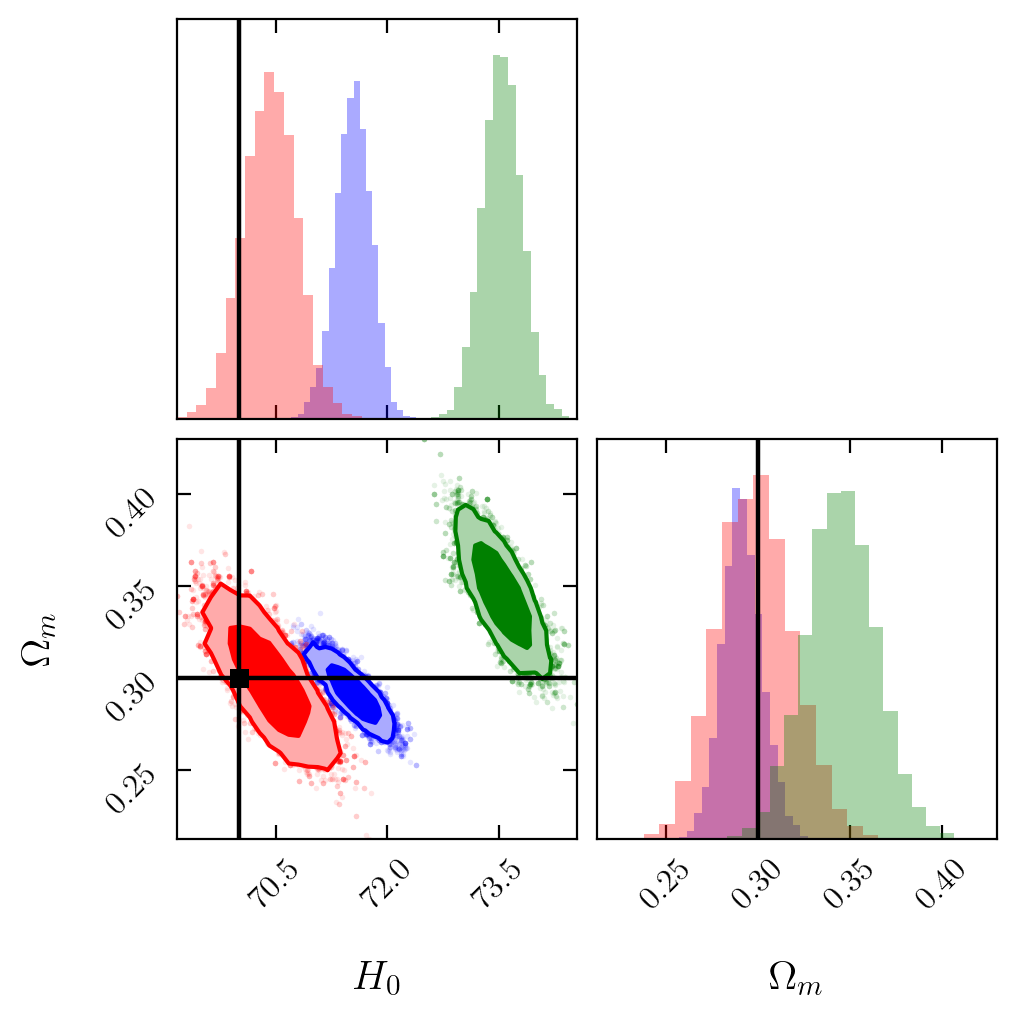

In [20]:
import corner
fig = corner.corner(flat_samples1, labels=['$H_0$', '$\Omega_m$'], color='b', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'b', 'alpha':1/3, 'linewidth':0, 'fill': True})
corner.corner(flat_samples2, fig=fig, labels=['$H_0$', '$\Omega_m$'], color='r', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'r', 'alpha':1/3, 'linewidth':0, 'fill': True})
corner.corner(flat_samples3, fig=fig, labels=['$H_0$', '$\Omega_m$'], color='g', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'g', 'alpha':1/3, 'linewidth':0, 'fill': True})
plt.show()

# Combined Sample

Finally, we combine each of the samples into a large master sample and perform the same analysis.

In [21]:
all_z = np.concatenate((z1, z2, z3))
all_dL = np.concatenate((d1_L, d2_L, d3_L))
all_dL_err = np.concatenate((d1_err, d2_err, d3_err))

In [22]:
ndim = 2
nwalkers = 10
nsteps = 2000

p0 = np.random.uniform(50, 100, (nwalkers, 1))
p0 = np.append(p0, np.random.uniform(0, 1, (nwalkers, 1)), axis=1)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(all_z, all_dL, all_dL_err))
p0, _, _ = sampler.run_mcmc(p0, nsteps, progress=True)

100%|██████████| 2000/2000 [14:18<00:00,  2.33it/s]


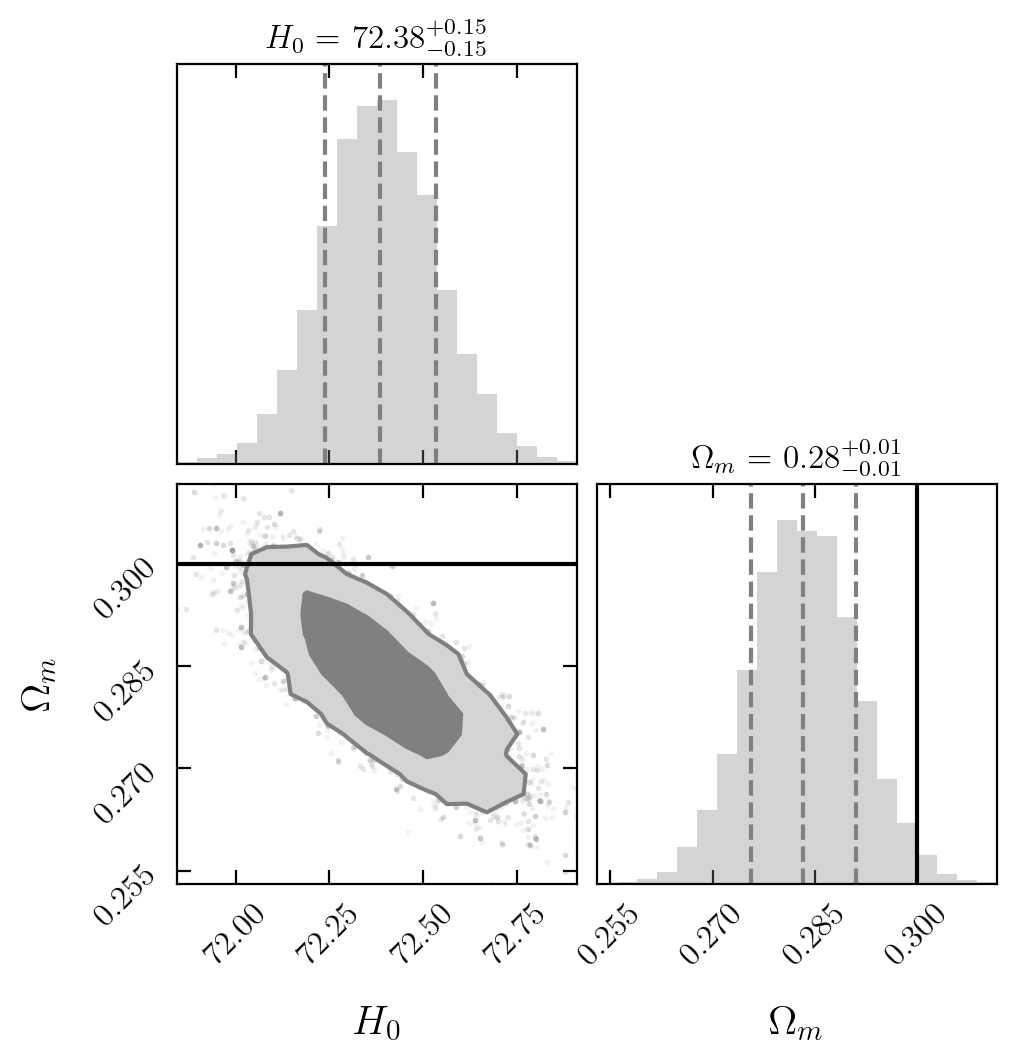

In [23]:
flat_samples = sampler.get_chain(discard=400, thin=1, flat=True)

import corner
fig = corner.corner(flat_samples, labels=['$H_0$', '$\Omega_m$'], color='grey', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], quantiles=[0.16, 0.5, 0.84], hist_kwargs={'color': 'grey', 'alpha':1/3, 'linewidth':0, 'fill': True}, show_titles=True)

We find that the combined sample actually has the lowest $\Omega_m$, but it is still consistent with Betoule et al. (2014) and SCPU. We find a value of $H_0$ between the results of SCPU and Pantheon+SH0ES.

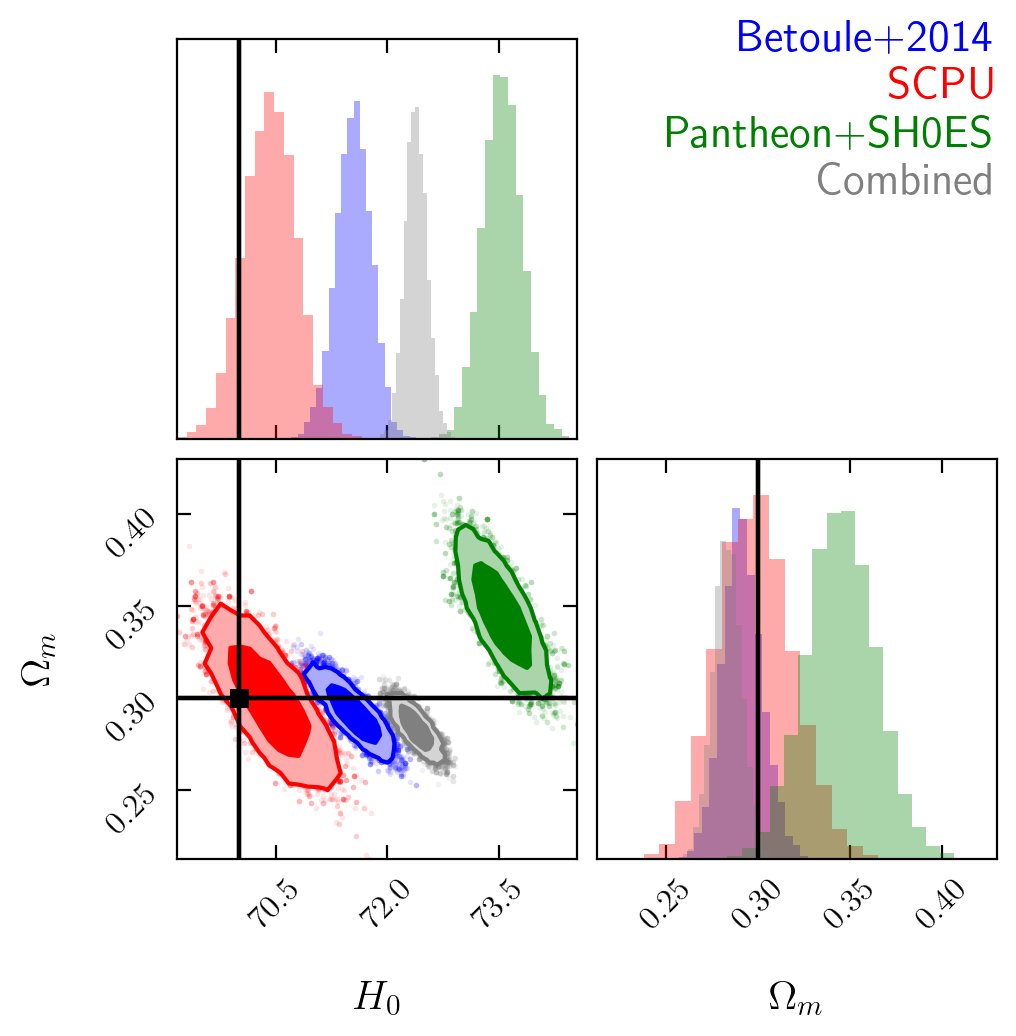

In [24]:
import corner
fig = corner.corner(flat_samples1, labels=['$H_0$', '$\Omega_m$'], color='b', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'b', 'alpha':1/3, 'linewidth':0, 'fill': True})
corner.corner(flat_samples2, fig=fig, labels=['$H_0$', '$\Omega_m$'], color='r', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'r', 'alpha':1/3, 'linewidth':0, 'fill': True})
corner.corner(flat_samples3, fig=fig, labels=['$H_0$', '$\Omega_m$'], color='g', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'g', 'alpha':1/3, 'linewidth':0, 'fill': True})
corner.corner(flat_samples, fig=fig, labels=['$H_0$', '$\Omega_m$'], color='grey', truths=[70, 0.3], truth_color='k', fill_contours=True, levels=[0.68, 0.95], hist_kwargs={'color': 'grey', 'alpha':1/3, 'linewidth':0, 'fill': True})

axes = fig.get_axes()
axes[1].text(1, 1, 'Betoule+2014', transform=axes[1].transAxes, fontsize=16, verticalalignment='center', horizontalalignment='right', c='b')
axes[1].text(1, 0.88, 'SCPU', transform=axes[1].transAxes, fontsize=16, verticalalignment='center', horizontalalignment='right', c='r')
axes[1].text(1, 0.76, 'Pantheon+SH0ES', transform=axes[1].transAxes, fontsize=16, verticalalignment='center', horizontalalignment='right', c='g')
axes[1].text(1, 0.64, 'Combined', transform=axes[1].transAxes, fontsize=16, verticalalignment='center', horizontalalignment='right', c='grey')

plt.show()

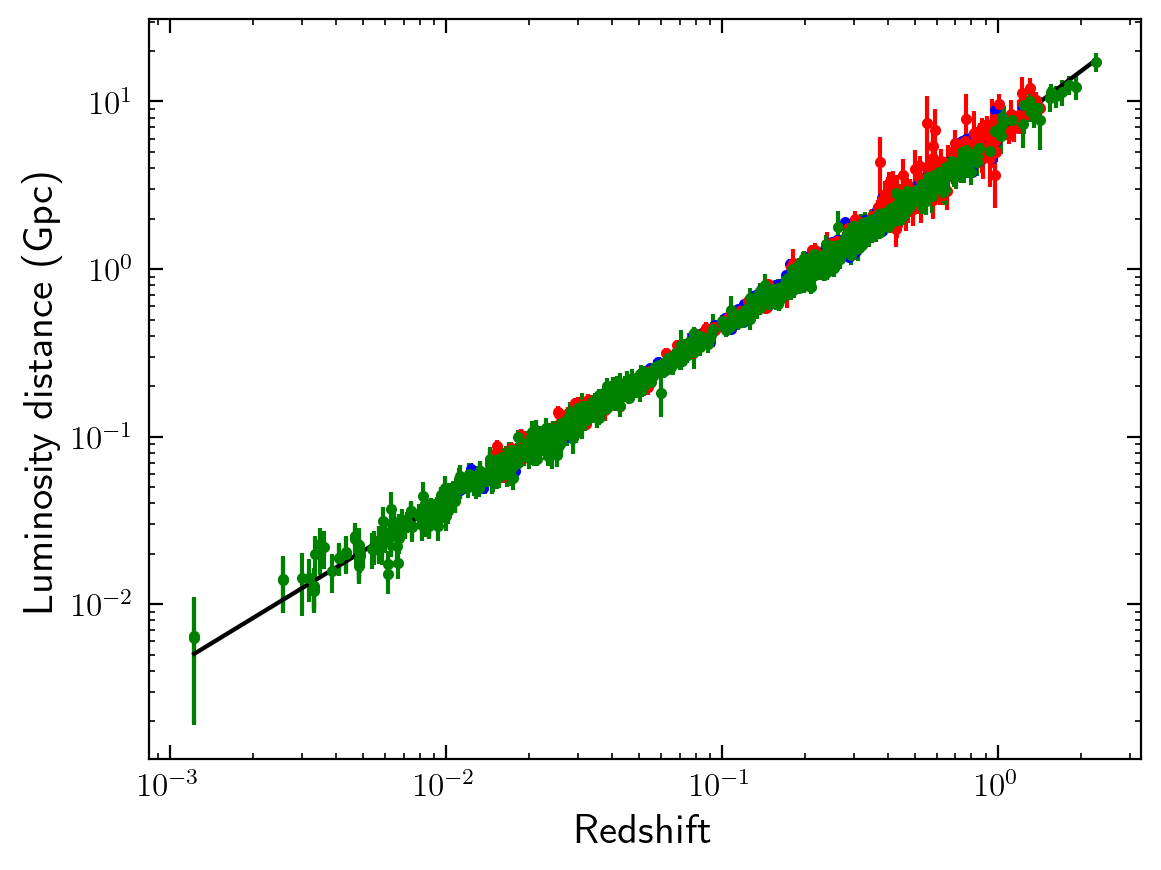

In [25]:
model = np.zeros((100, len(all_z)))
for i in range(len(model)):
    rand_sample = flat_samples[np.random.randint(len(flat_samples))]
    model[i] = np.array([d_L(zi, rand_sample[0], rand_sample[1], 1 - rand_sample[1]) for zi in sorted(all_z)])

sigm2 = np.percentile(model, 2.5, axis=0)
sigm1 = np.percentile(model, 16, axis=0)
median = np.median(model, axis=0)
sigp1 = np.percentile(model, 84, axis=0)
sigp2 = np.percentile(model, 97.5, axis=0)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Redshift')
plt.ylabel('Luminosity distance (Gpc)')

plt.errorbar(z1, d1_L, yerr=d1_err, c='b', marker='.', linestyle='None')
plt.errorbar(z2, d2_L, yerr=d2_err, c='r', marker='.', linestyle='None')
plt.errorbar(z3, d3_L, yerr=d3_err, c='g', marker='.', linestyle='None')
plt.fill_between(sorted(all_z), sigm2, sigp2, color='k', alpha=0.1)
plt.fill_between(sorted(all_z), sigm1, sigp1, color='k', alpha=0.3)
plt.plot(sorted(all_z), median, c='k')

Here we plot all four of our results. We see that there is very little difference by eye, but the Pantheon+SH0ES result is slight down and right from the other models. This could suggest that the Pantheon+SH0ES data slightly overestimates the redshift, or slightly underestimates the luminosity distance.

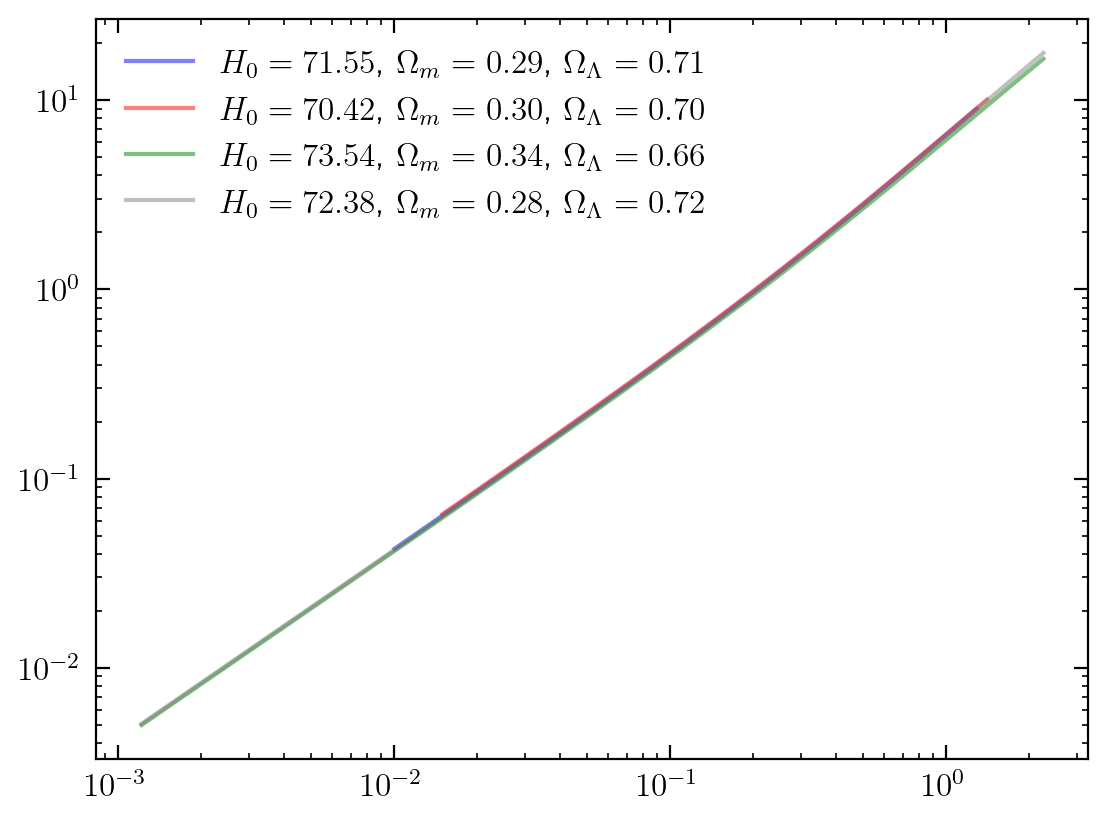

In [26]:
plt.xscale('log')
plt.yscale('log')

plt.plot(sorted(z1), median1, c='b', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$, $\Omega_\Lambda = {:.2f}$'.format(np.median(flat_samples1[:,0]), np.median(flat_samples1[:,1]), 1-np.median(flat_samples1[:,1])), alpha=0.5)
plt.plot(sorted(z2), median2, c='r', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$, $\Omega_\Lambda = {:.2f}$'.format(np.median(flat_samples2[:,0]), np.median(flat_samples2[:,1]), 1-np.median(flat_samples2[:,1])), alpha=0.5)
plt.plot(sorted(z3), median3, c='g', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$, $\Omega_\Lambda = {:.2f}$'.format(np.median(flat_samples3[:,0]), np.median(flat_samples3[:,1]), 1-np.median(flat_samples3[:,1])), alpha=0.5)
plt.plot(sorted(all_z), median, c='grey', label='$H_0 = {:.2f}$, $\Omega_m = {:.2f}$, $\Omega_\Lambda = {:.2f}$'.format(np.median(flat_samples[:,0]), np.median(flat_samples[:,1]), 1-np.median(flat_samples[:,1])), alpha=0.5)

plt.legend()


Overall, we find relatively good agreement between our results and previous results. From all of our samples, we find that $\Omega_m$ is about $0.3$, and $H_0$ is a between $70$ and $74\rm\ km/s/Mpc$.

From each of the corner plots, we can see the $H_0$ and $\Omega_m$ are negatively correlated. This correlation can be understood by understanding the behavior of the curve for increasing $H_0$ and $\Omega_m$. At low redshifts, Hubble's law applies, so the luminosity distance is $d_L = \frac{cz}{H_0}$. At a fixed redshift value, a decrease in $H_0$ leads to an increase in $d_L$. If we decrease $\Omega_m$, we increase $\Omega_\Lambda$, because we fixed $\Omega_\Lambda = 1 - \Omega_m$. An increase in $\Omega_\Lambda$ leads to accelerated expansion, and increases $d_L$. We see that a decrease in either $H_0$ or $\Omega_m$ leads to an increase in $d_L$, and so they must be negatively correlated. Our findings therefore make intuitive sense, and agree with expectations.

Keeping this correlation in mind, we find it odd that the outlier sample, Pantheon+SH0ES, has both a higher $H_0$ and a higher $\Omega_m$ than any of the other samples. We expect these parameters to be negatively correlated, and yet we observe an increase in both. When we plotted the median samples, we found that the median Pantheon+SH0ES model is slightly below each of the others. A decrease in luminosity distance would correspond to a higher $H_0$ and/or a higher $\Omega_m$, so this offset is likely the reason the derived parameters are outliers. It is unclear if there is an error in redshift, luminosity distance, both, or neither. Based on the documentation provided, we believe the distance modulus is corrected for differences in absolute magnitude, but if it is not, a correction would change the luminosity distance and potentially bring the results closer to our other results.

Comparing to previous values in the literature, we find that our values for $\Omega_m$ are very close to the value found by the DESI team for a flat $\Lambda\rm CDM$ cosmology, $0.295\pm0.015$ ([DESI Collaboration 2024](https://arxiv.org/pdf/2404.03002)). Our values for $H_0$ however, are higher than their $68.53\pm0.80$. Even our lowest $H_0$ value is 2.4 sigma away from their value. Our work agrees with previous work using SN Ia, but it is still in disagreement with measurements of $H_0$ from the CMB power spectrum.

Unfortunately we have been unable to resolve the Hubble tension.